In [1]:
import pandas as pd
import numpy as np
from pyalex import Works
import pyalex
pyalex.config.email = "tarakomarecity@gmail.com"

flatten2 = lambda l: [item for sublist in l if sublist == sublist for item in sublist]

In [2]:
pager = Works().filter(concepts={"id": "C2779821442"})\
            .select(["id", "title", "publication_year", "authorships", "referenced_works"]).paginate(per_page=200, n_max=None)

works_json = []
for page in pager:
    for item in page:
        works_json.append(item)
    print(len(works_json))


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
4000
4200
4400
4600
4800
5000
5200
5400
5600
5800
6000
6200
6400
6600
6800
7000
7200
7400
7600
7800
8000
8200
8400
8600
8800
9000
9200
9400
9600
9800
10000
10200
10400
10600
10800
11000
11200
11400
11600
11800
12000
12200
12400
12600
12800
13000
13200
13400
13600
13800
14000
14200
14400
14600
14800
15000
15200
15400
15600
15800
16000
16200
16400
16600
16800
17000
17200
17400
17600
17800
18000
18200
18400
18600
18800
19000
19200
19400
19600
19800
20000
20200
20311
20311


In [3]:
works_json

[{'id': 'https://openalex.org/W2326400185',
  'title': 'Norms and Counter-Norms in a Select Group of the Apollo Moon Scientists: A Case Study of the Ambivalence of Scientists',
  'publication_year': 1974,
  'authorships': [{'author_position': 'first',
    'author': {'id': 'https://openalex.org/A5050721405',
     'display_name': 'Ian I. Mitroff',
     'orcid': None},
    'institutions': [],
    'countries': [],
    'is_corresponding': True,
    'raw_author_name': 'Ian I. Mitroff',
    'raw_affiliation_string': '',
    'raw_affiliation_strings': []}],
  'referenced_works': ['https://openalex.org/W571635531',
   'https://openalex.org/W1514629413',
   'https://openalex.org/W1565693361',
   'https://openalex.org/W1642453095',
   'https://openalex.org/W1966136416',
   'https://openalex.org/W1977062359',
   'https://openalex.org/W1979219735',
   'https://openalex.org/W2002945391',
   'https://openalex.org/W2040352882',
   'https://openalex.org/W2041273782',
   'https://openalex.org/W205621501

In [4]:
years = pd.Series(
    {work['id']: work['publication_year'] for work in works_json},
    name='year'
)
years.index.name = 'eid'

citations_data = []
for work in works_json:
    target_id = work['id']
    for referenced_work in work['referenced_works']:
        citations_data.append({'source': referenced_work, 'target': target_id})
citations_df = pd.DataFrame(citations_data)

team_sizes = pd.Series(
    {work['id']: len(work['authorships']) for work in works_json},
    name='team_size'
)
team_sizes.index.name = 'eid'

display(years, citations_df, team_sizes)

eid
https://openalex.org/W2326400185    1974
https://openalex.org/W2164085656    2002
https://openalex.org/W2038542095    1973
https://openalex.org/W1969539124    2001
https://openalex.org/W2339241607    1969
                                    ... 
https://openalex.org/W756840455     1993
https://openalex.org/W763821330     1993
https://openalex.org/W834682944     1993
https://openalex.org/W854368410     1993
https://openalex.org/W939861058     1993
Name: year, Length: 20311, dtype: int64

source                            target
0       https://openalex.org/W571635531  https://openalex.org/W2326400185
1      https://openalex.org/W1514629413  https://openalex.org/W2326400185
2      https://openalex.org/W1565693361  https://openalex.org/W2326400185
3      https://openalex.org/W1642453095  https://openalex.org/W2326400185
4      https://openalex.org/W1966136416  https://openalex.org/W2326400185
...                                 ...                               ...
46172  https://openalex.org/W2099897318  https://openalex.org/W2109288038
46173  https://openalex.org/W2799048904  https://openalex.org/W2109288038
46174  https://openalex.org/W4248420696  https://openalex.org/W2109288038
46175  https://openalex.org/W4253996302  https://openalex.org/W2109288038
46176  https://openalex.org/W2015570721  https://openalex.org/W4247551893

[46177 rows x 2 columns]

eid
https://openalex.org/W2326400185     1
https://openalex.org/W2164085656    19
https://openalex.org/W2038542095     3
https://openalex.org/W1969539124     5
https://openalex.org/W2339241607     1
                                    ..
https://openalex.org/W756840455      1
https://openalex.org/W763821330      3
https://openalex.org/W834682944      1
https://openalex.org/W854368410      1
https://openalex.org/W939861058      2
Name: team_size, Length: 20311, dtype: int64

In [5]:
def citation_groupby(df_citation):
    '''source,targetのDataFrameを引用先，引用元ごとにgroupby
    
    input: source,targetをcolumnにもつedgeのDataFrame

    index: eid
    source: indexが引用先となる論文群(新)
    target: indexが引用元となる論文群(旧)
    '''
    
    citations_source_gp = df_citation.groupby('source').agg(list)
    citations_target_gp = df_citation.groupby('target').agg(list)
    df_citation_gp = pd.concat([citations_source_gp,citations_target_gp],axis = 1)
    return df_citation_gp

citations_gb = citation_groupby(citations_df)
citations_gb

target  \
https://openalex.org/W1001230174                  [https://openalex.org/W108055609]   
https://openalex.org/W1004232350                 [https://openalex.org/W3183570743]   
https://openalex.org/W1004682782                 [https://openalex.org/W3088200676]   
https://openalex.org/W100471250                  [https://openalex.org/W1584906355]   
https://openalex.org/W1007086712  [https://openalex.org/W2251098479, https://ope...   
...                                                                             ...   
https://openalex.org/W96144882                                                  NaN   
https://openalex.org/W97960127                                                  NaN   
https://openalex.org/W983008811                                                 NaN   
https://openalex.org/W99442722                                                  NaN   
https://openalex.org/W998577157                                                 NaN   

                                                                             source  
https://openalex.org/W1001230174                                                NaN  
https://openalex.org/W1004232350                                                NaN  
https://openalex.org/W1004682782                                                NaN  
https://openalex.org/W100471250                                                 NaN  
https://openalex.org/W1007086712                                                NaN  
...                                                                             ...  
https://openalex.org/W96144882    [https://openalex.org/W67499571, https://opena...  
https://openalex.org/W97960127    [https://openalex.org/W1966617427, https://ope...  
https://openalex.org/W983008811                  [https://openalex.org/W2035110810]  
https://openalex.org/W99442722                   [https://openalex.org/W1996697997]  
https://openalex.org/W998577157                   [https://openalex.org/W367555572]  

[34143 rows x 2 columns]

In [6]:
def get_score(node):
    try:
        node_r = set(citations_gb.target.loc[node])
        node_r_c = set(flatten2([citations_gb.source.loc[x] for x in node_r])) - set([node])
        node_c = set(citations_gb.source.loc[node])
        allnodes = node_c | node_r_c
        cite_target = node_c - node_r_c
        cite_targetref = node_r_c - node_c
        cite_target_targetref_both = node_r_c & node_c
        score = (len(cite_target)*1 + len(cite_target_targetref_both)*-1 + len(cite_targetref)*0)/len(allnodes)
        return score
    except:
        return None

In [7]:
#eids = citations_gb.index

#from multiprocessing import Pool
#P = Pool(20)
#res = P.map(get_score,eids)
#P.terminate()
#P.close()
#scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])
#display(scores, scores[scores[1].notna()])

#scores.index = scores[0]
#scores['year'] = scores[0].map(years)
#display(scores)

In [8]:
eids = citations_gb.index

res = []
for eid in eids:
    res.append(get_score(eid))
scores = pd.DataFrame([[eid,re] for eid,re in zip(eids,res)])
display(scores, scores[scores[1].notna()])

scores.index = scores[0]
scores['team_size'] = scores[0].map(team_sizes)
display(scores)

0   1
0      https://openalex.org/W1001230174 NaN
1      https://openalex.org/W1004232350 NaN
2      https://openalex.org/W1004682782 NaN
3       https://openalex.org/W100471250 NaN
4      https://openalex.org/W1007086712 NaN
...                                 ...  ..
34138    https://openalex.org/W96144882 NaN
34139    https://openalex.org/W97960127 NaN
34140   https://openalex.org/W983008811 NaN
34141    https://openalex.org/W99442722 NaN
34142   https://openalex.org/W998577157 NaN

[34143 rows x 2 columns]

0         1
55      https://openalex.org/W111846619  0.358491
131     https://openalex.org/W131903257  0.340426
136     https://openalex.org/W132843025  0.100000
157      https://openalex.org/W13926935 -0.055556
189    https://openalex.org/W1457723727  0.428571
...                                 ...       ...
31167   https://openalex.org/W822137311 -0.100000
31198   https://openalex.org/W835428733  0.125000
31228   https://openalex.org/W846673157 -0.058824
31272    https://openalex.org/W87932762  0.000000
31319    https://openalex.org/W94589823  1.000000

[1023 rows x 2 columns]

0   1  \
0                                                                        
https://openalex.org/W1001230174  https://openalex.org/W1001230174 NaN   
https://openalex.org/W1004232350  https://openalex.org/W1004232350 NaN   
https://openalex.org/W1004682782  https://openalex.org/W1004682782 NaN   
https://openalex.org/W100471250    https://openalex.org/W100471250 NaN   
https://openalex.org/W1007086712  https://openalex.org/W1007086712 NaN   
...                                                            ...  ..   
https://openalex.org/W96144882      https://openalex.org/W96144882 NaN   
https://openalex.org/W97960127      https://openalex.org/W97960127 NaN   
https://openalex.org/W983008811    https://openalex.org/W983008811 NaN   
https://openalex.org/W99442722      https://openalex.org/W99442722 NaN   
https://openalex.org/W998577157    https://openalex.org/W998577157 NaN   

                                  team_size  
0                                            
https://openalex.org/W1001230174        NaN  
https://openalex.org/W1004232350        NaN  
https://openalex.org/W1004682782        NaN  
https://openalex.org/W100471250         NaN  
https://openalex.org/W1007086712        NaN  
...                                     ...  
https://openalex.org/W96144882          1.0  
https://openalex.org/W97960127          1.0  
https://openalex.org/W983008811         1.0  
https://openalex.org/W99442722          2.0  
https://openalex.org/W998577157         1.0  

[34143 rows x 3 columns]

In [9]:
scores_notna = scores[scores[1].notna() & scores['team_size'].notna()].drop(columns=0)
scores_notna

1  team_size
0                                                    
https://openalex.org/W111846619   0.358491        2.0
https://openalex.org/W131903257   0.340426        1.0
https://openalex.org/W132843025   0.100000        1.0
https://openalex.org/W13926935   -0.055556        3.0
https://openalex.org/W1457723727  0.428571        1.0
...                                    ...        ...
https://openalex.org/W822137311  -0.100000        1.0
https://openalex.org/W835428733   0.125000        2.0
https://openalex.org/W846673157  -0.058824        2.0
https://openalex.org/W87932762    0.000000        3.0
https://openalex.org/W94589823    1.000000        3.0

[1023 rows x 2 columns]

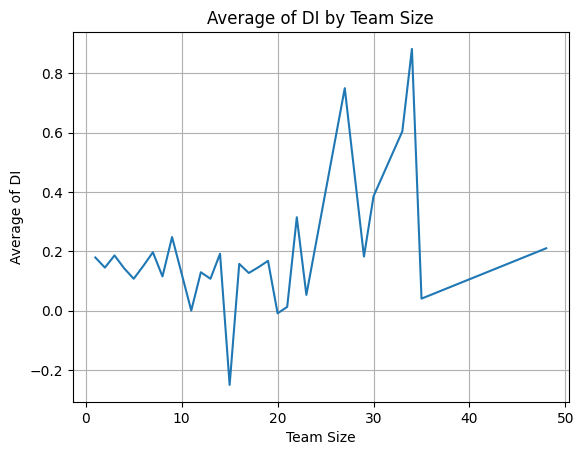

In [10]:
import matplotlib.pyplot as plt

# team_sizeごとにグループ化
grouped_df = scores_notna.groupby('team_size').mean()

# グラフの描画
plt.plot(grouped_df.index, grouped_df[1])
plt.xlabel('Team Size')
plt.ylabel('Average of DI')
plt.title('Average of DI by Team Size')
plt.grid(True)
plt.show()